In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cdl_df = pd.read_csv("Credit_card_label.csv")
cd_df = pd.read_csv("Credit_card.csv")
cd_df.head(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2


In [5]:
cd_df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

Below I further cleanse null values including for GENDER and Type_Occupation

In [6]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
cols_to_impute_numeric = ['Annual_income','Birthday_count']
cd_df[cols_to_impute_numeric] = imputer.fit_transform(cd_df[cols_to_impute_numeric])
    

imputer =  SimpleImputer(missing_values=np.nan, strategy = 'most_frequent' )
cols_to_impute_string = ['GENDER','Type_Occupation']
cd_df[cols_to_impute_string] = imputer.fit_transform(cd_df[cols_to_impute_string])
cd_df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
dtype: int64

In [7]:
df = pd.merge(cd_df, cdl_df, on='Ind_ID', how="outer")
df = df.drop(columns=['Ind_ID','Mobile_phone'], axis=1)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Laborers,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0


In [8]:
number_columns = ['GENDER', 'Car_Owner', 'Propert_Owner']
other_columns = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in number_columns:
    df[i] = le.fit_transform(df[i])
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,1,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Laborers,2,1
1,0,1,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,0,0,1,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0


I expanded my get dummies to more columns

In [10]:
df = pd.get_dummies(df, columns = other_columns, dtype=int)
df.head(3)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0,180000.0,-18772.0,365243,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,2,135000.0,-15761.0,-3173,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,247500.0,-17016.0,-1347,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Part 2

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:
df["label"].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [13]:
X = df.drop('label', axis = 1)
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [14]:
from imblearn.under_sampling import ClusterCentroids
rus = ClusterCentroids(random_state=42)
X_resampled, Y_resampled = rus.fit_resample(X_train, Y_train)
model = LogisticRegression(random_state=42)
model.fit(X_resampled, Y_resampled)

c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

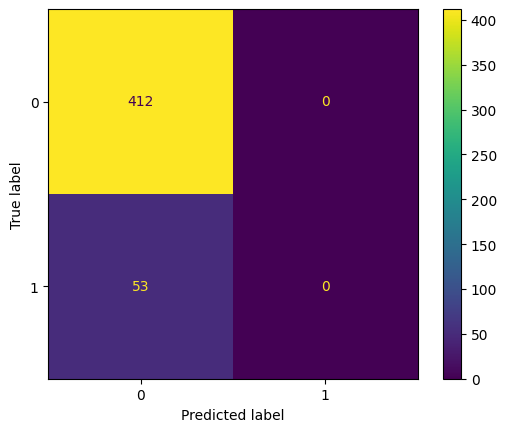

In [15]:
Y_pred = model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

Undersampling cooked becuase it takes away from the majority case making the minority case to majority case bias less

In [16]:
47/(47+6)

0.8867924528301887

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

X = df.drop('label', axis = 1)
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42)

from sklearn.preprocessing import StandardScaler
S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.fit_transform(X_test)
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
Y_pred

array([0.16666667, 0.        , 0.16666667, 0.        , 0.25      ,
       0.16666667, 0.25      , 0.        , 0.        , 0.        ,
       0.        , 0.08333333, 0.16666667, 0.16666667, 0.16666667,
       0.        , 0.25      , 0.        , 0.        , 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.16666667, 0.        ,
       0.16666667, 0.        , 0.41666667, 0.        , 0.08333333,
       0.16666667, 0.16666667, 0.        , 0.41666667, 0.        ,
       0.33333333, 0.        , 0.        , 0.08333333, 0.        ,
       0.33333333, 0.16666667, 0.25      , 0.08333333, 0.5       ,
       0.08333333, 0.        , 0.08333333, 0.        , 0.33333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.16666667,
       0.33333333, 0.        , 0.        , 0.16666667, 0.41666667,
       0.        , 0.25      , 0.        , 0.08333333, 0.16666667,
       0.08333333, 0.        , 0.        , 0.08333333, 0.08333333,
       0.        , 0.25      , 0.08333333, 0.16666667, 0.16666

In [18]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = "linear", random_state=4)
model_SVC.fit(X_train, Y_train)

SVC(kernel='linear', random_state=4)

In [19]:
model_perf = model_SVC.predict(X_test)
print(model_perf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Logistic regrssion to SVC the predict there are less 1 values with SVC

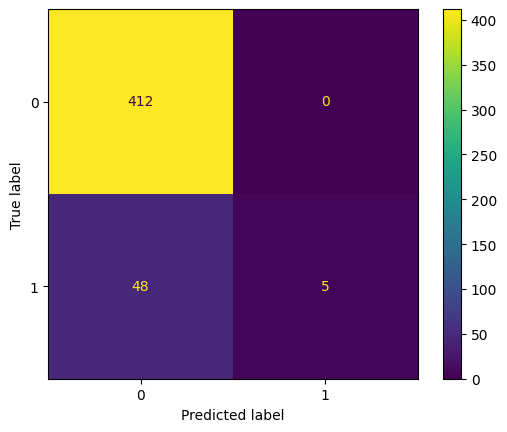

In [20]:

ConfusionMatrixDisplay.from_estimator(model_SVC, X_test, Y_test)

part 3

In [21]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, Y_pred)
auc_logistic =auc(logistic_fpr, logistic_tpr)

<function matplotlib.pyplot.show(close=None, block=None)>

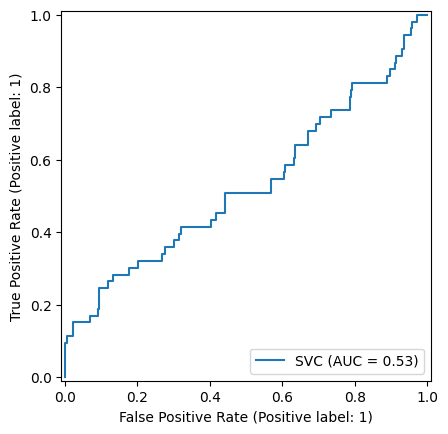

In [22]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_SVC, X_test, Y_test)

plt.show

In [23]:
auc_val = auc(logistic_fpr, logistic_tpr)

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, model.predict_proba(X)[:,1])

np.float64(0.5989699302882114)

In [25]:
roc_auc_score(Y, model.decision_function(X))

np.float64(0.5989699302882114)

Outlier detection which is also called anomially detection is the process of identifying data points that possess an extreme value compared to the rest of the distribution. It can be used for a variety of application like detecting bank fraud or cyber security attacks. When desciding what method to choose you first have to look at the datas modality, shape, and size. From there you can decide if you should use box plots, isolation forsest, or oneclassSVM.